In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load Dataset
df=pd.read_csv('C:/Users/pc/OneDrive/Desktop/ml/diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# 3. Data Pre-Processing
## 3.1 Data Cleaning 
### 3.1.1.	Missing Values

In [5]:
#checking for nulls
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#dropping column not needed
df=df.drop(df.columns[0],axis=1)

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 3.2 Outlier Treatment
### 3.2.1.	Outlier Detection

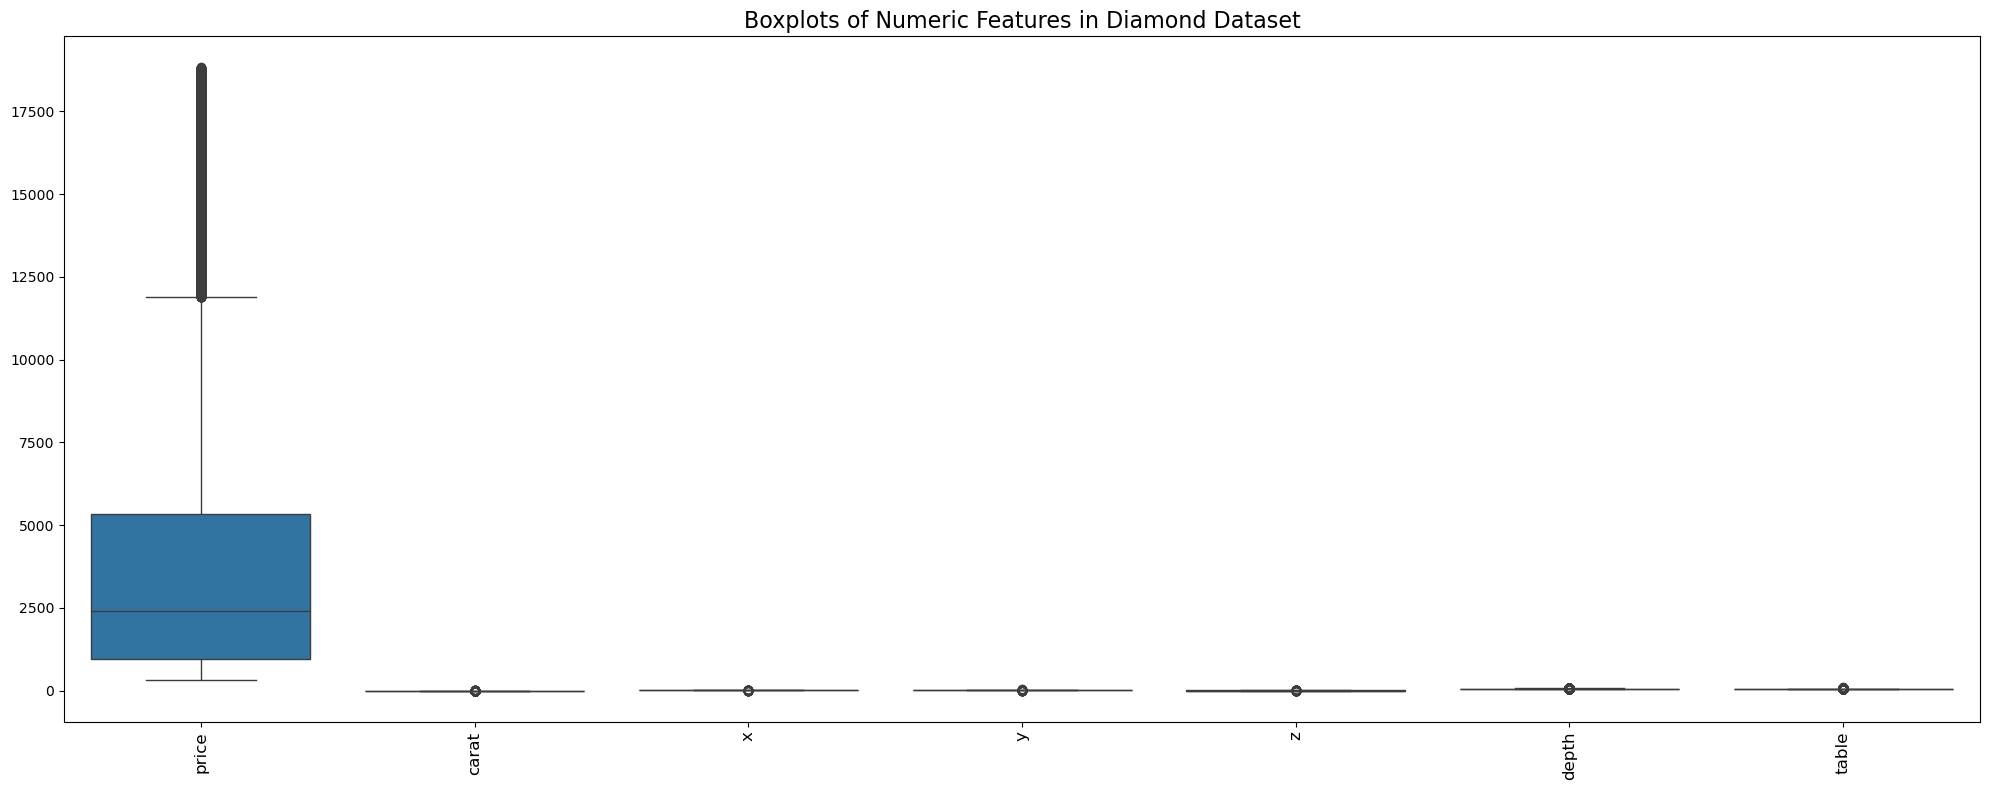

In [9]:
numeric_cols = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']

# Create the boxplot to view outliers
plt.figure(figsize=(20, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90, fontsize=12)
plt.title('Boxplots of Numeric Features in Diamond Dataset', fontsize=16)
plt.tight_layout()
plt.show()


### 3.2.2. Outlier Handling

Processing column: price


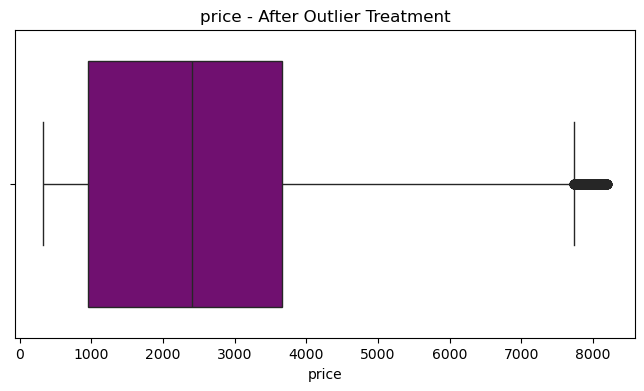

Processing column: carat


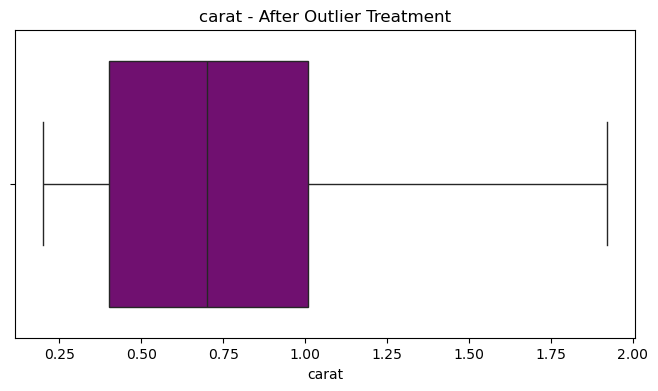

Processing column: x


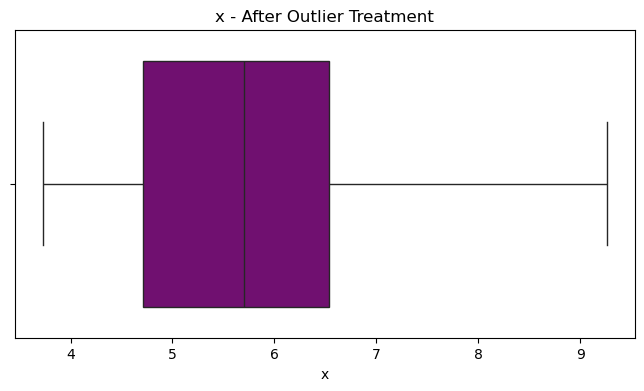

Processing column: y


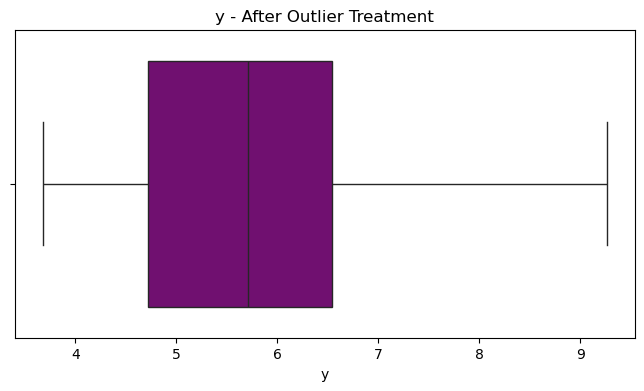

Processing column: z


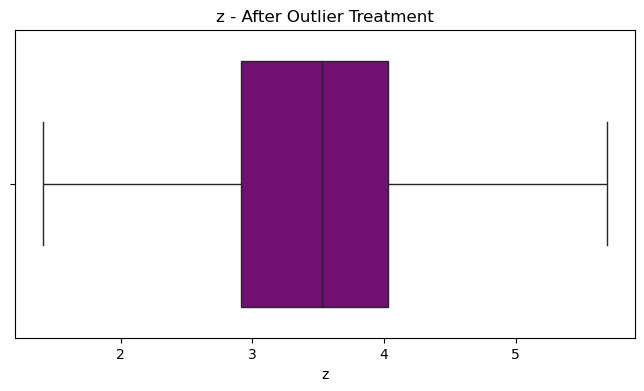

Processing column: depth


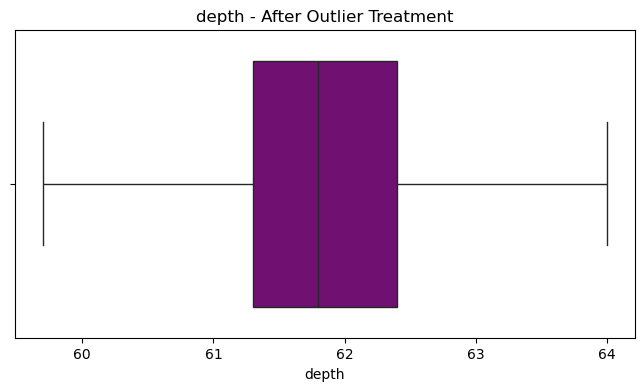

Processing column: table


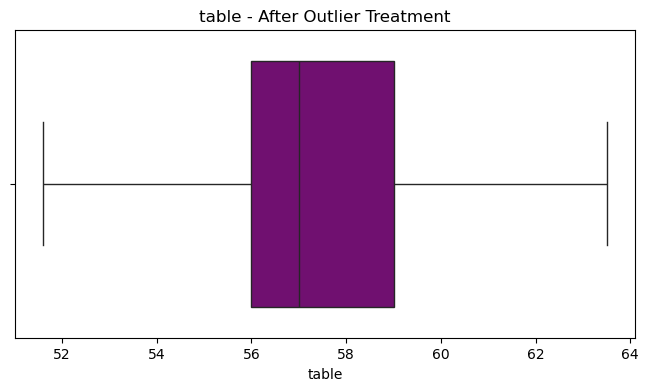

In [13]:
#treating outliers
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )

        # Box plot after treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column], color='purple')
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df

df_cleaned = outlier_treatment(df)

# 4. Exploratory Data Analysis (EDA)
## 4.1 Summary Statistics
### 4.1.1. Summary Table

In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.739991,61.850221,57.369216,2582.867241,5.730244,5.732341,3.538176
std,0.384170,0.893628,2.063058,1906.191120,1.116502,1.108834,0.689032
min,0.200000,59.700000,51.600000,326.000000,3.730000,3.680000,1.410000
25%,0.400000,61.300000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.010000,62.400000,59.000000,3662.000000,6.540000,6.540000,4.030000
max,1.920000,64.000000,63.500000,8192.000000,9.260000,9.260000,5.690000


## 4.2 Univariate Analysis
### 4.2.1.	Numerical Data

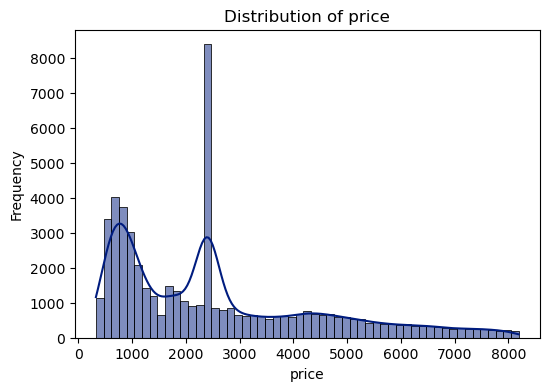

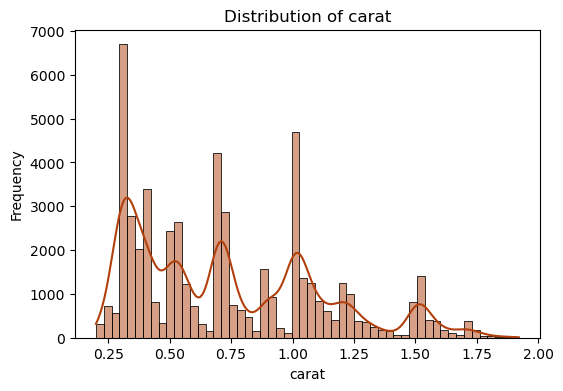

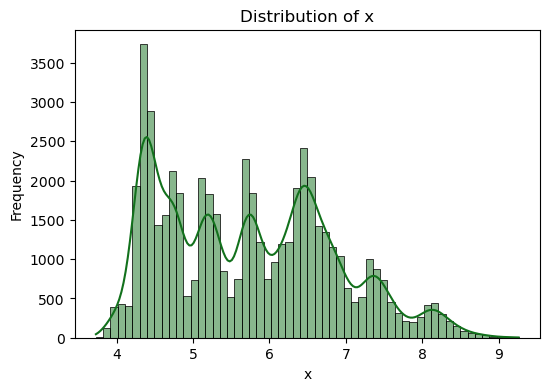

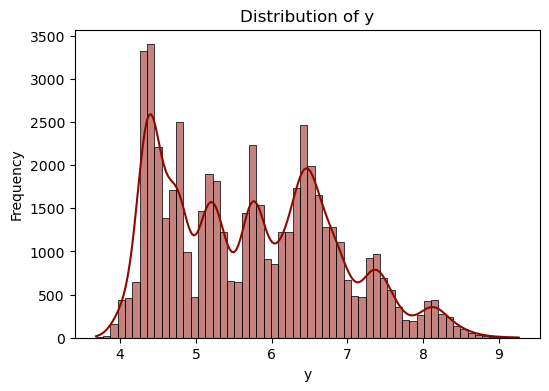

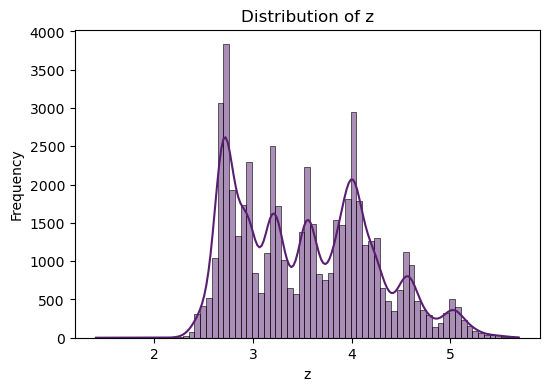

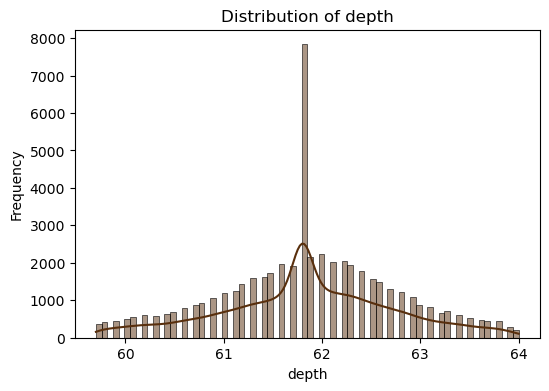

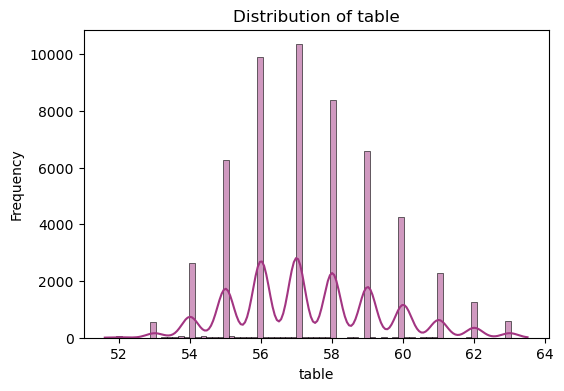

In [15]:
#histplot for skewness
numeric_cols = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']
colors = sns.color_palette('dark', len(numeric_cols))
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color=colors[i])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

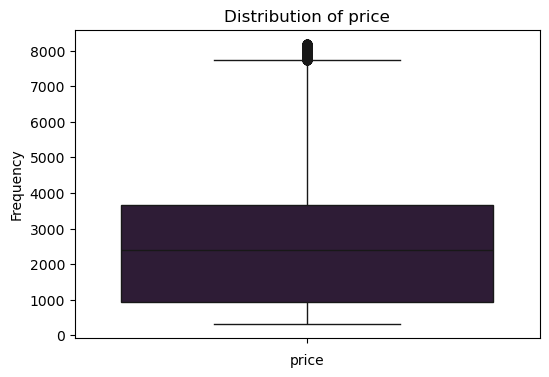

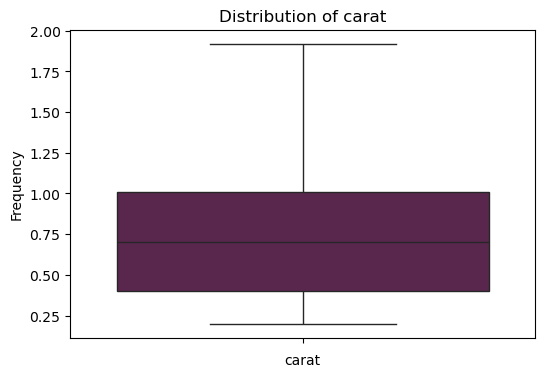

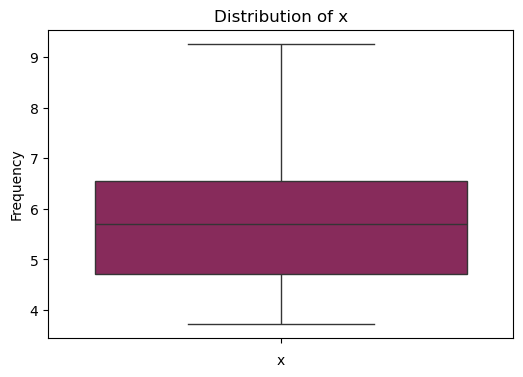

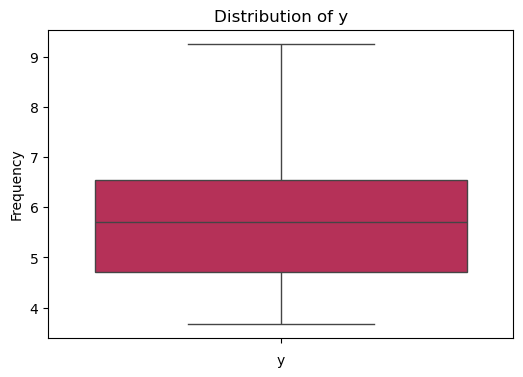

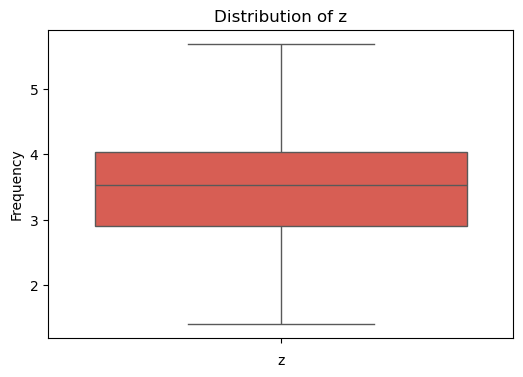

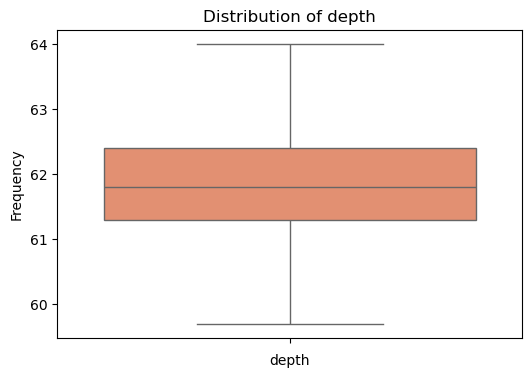

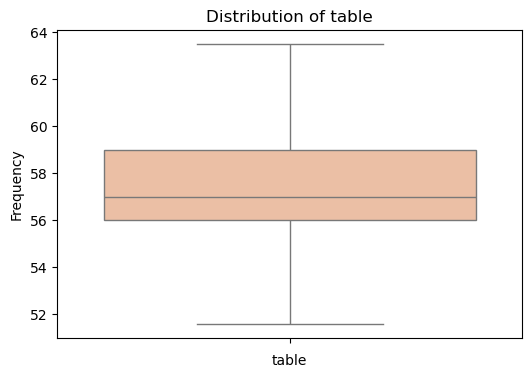

In [16]:
#boxplot for outliers
numeric_cols = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']
colors = sns.color_palette('rocket', len(numeric_cols))
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col], color=colors[i])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### 4.2.2. Categorical Data

In [17]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31


C:\Users\pc\AppData\Local\Temp\ipykernel_6268\323972955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


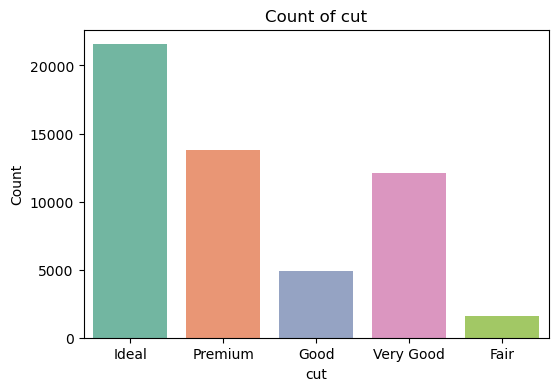

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\323972955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


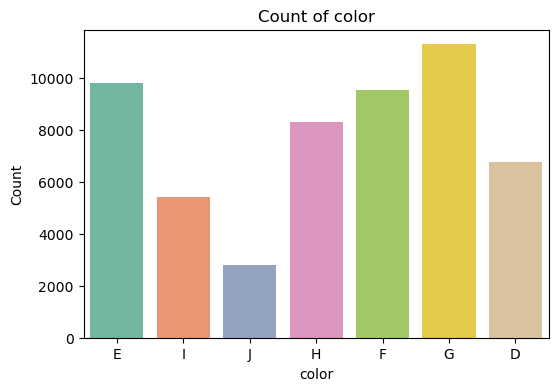

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\323972955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


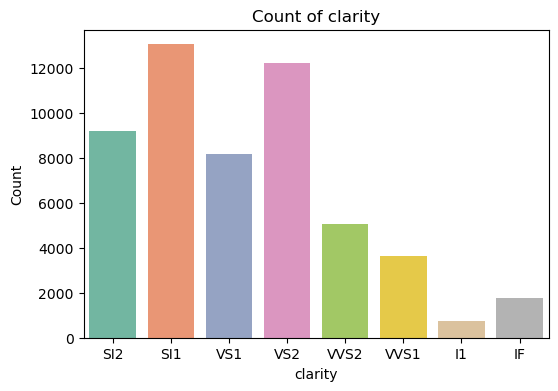

In [18]:
#bar chart to observe distribution of categorical variable
cat_cols=['cut','color','clarity']
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## 4.3 Bivariate Analysis
### 4.3.1. Numerical-Numerical Relationships

In [19]:
numerical_columns = df.select_dtypes(include=[np.number]).columns 
numerical_columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

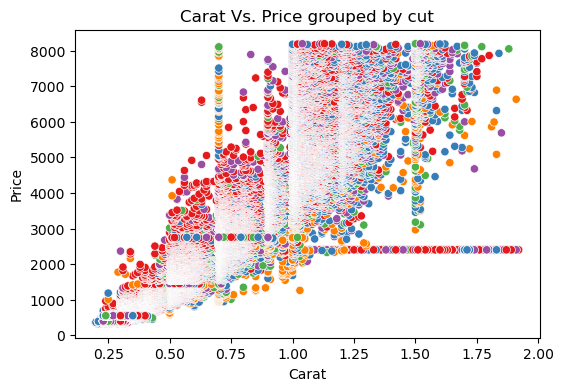

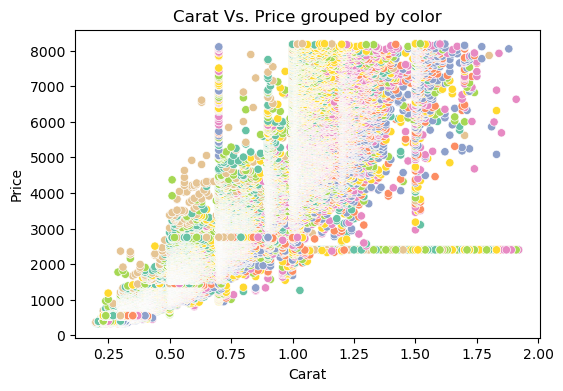

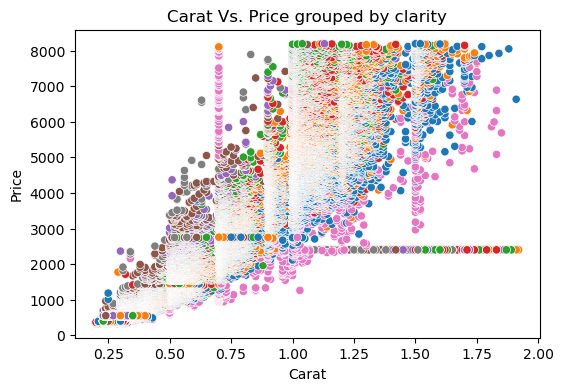

In [20]:
#scatter plots to find relationships between numerical variables

plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='price',hue='cut', data=df, palette='Set1', legend=False)
plt.title("Carat Vs. Price grouped by cut")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.tight_layout
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='price',hue='color', data=df, palette='Set2', legend=False)
plt.title("Carat Vs. Price grouped by color")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.tight_layout
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='price',hue='clarity', data=df, palette='tab10', legend=False)
plt.title("Carat Vs. Price grouped by clarity")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.tight_layout
plt.show()

### 4.3.2. Categorical-Numerical Relationships

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


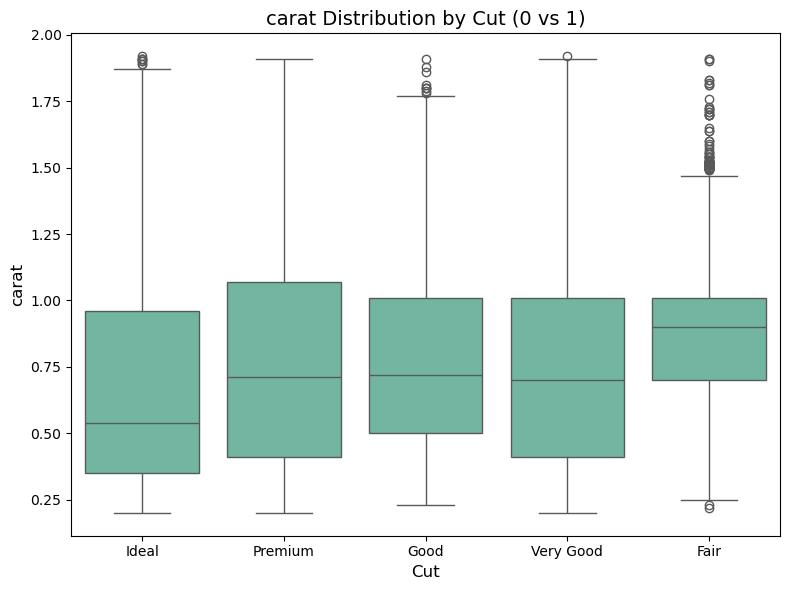

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


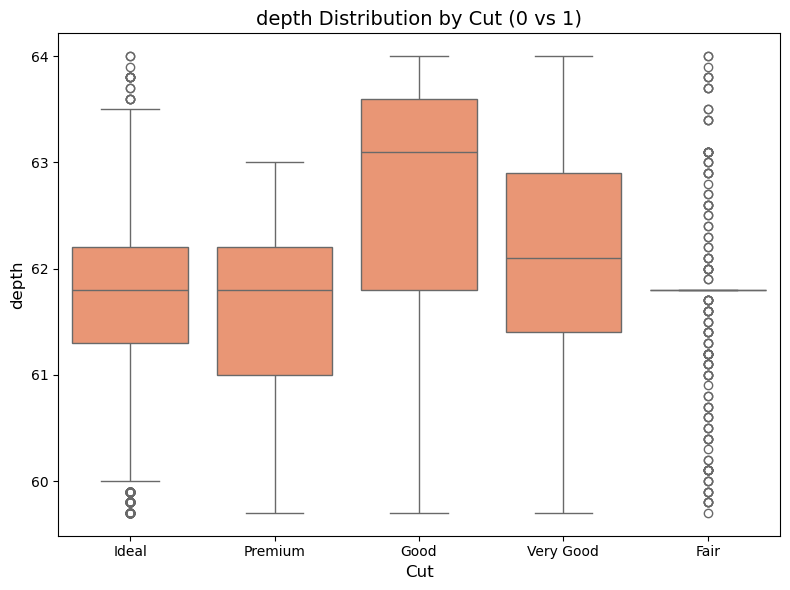

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


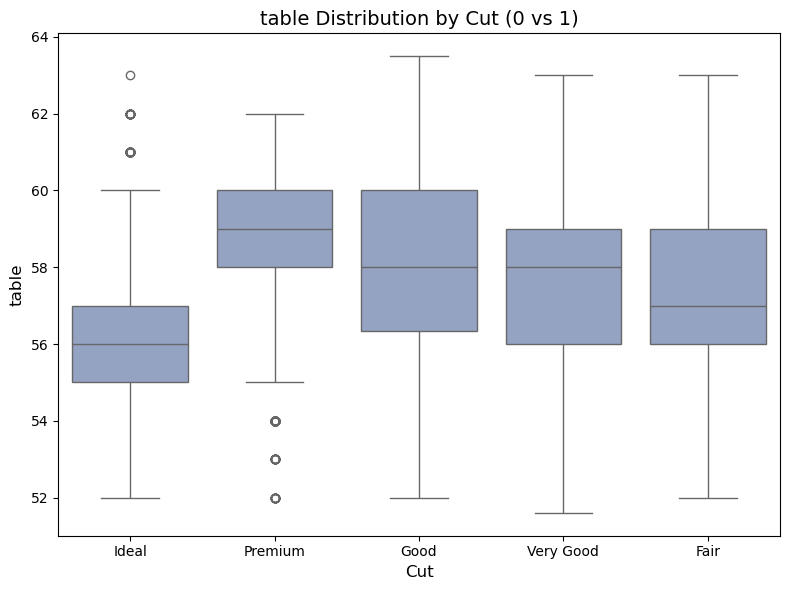

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


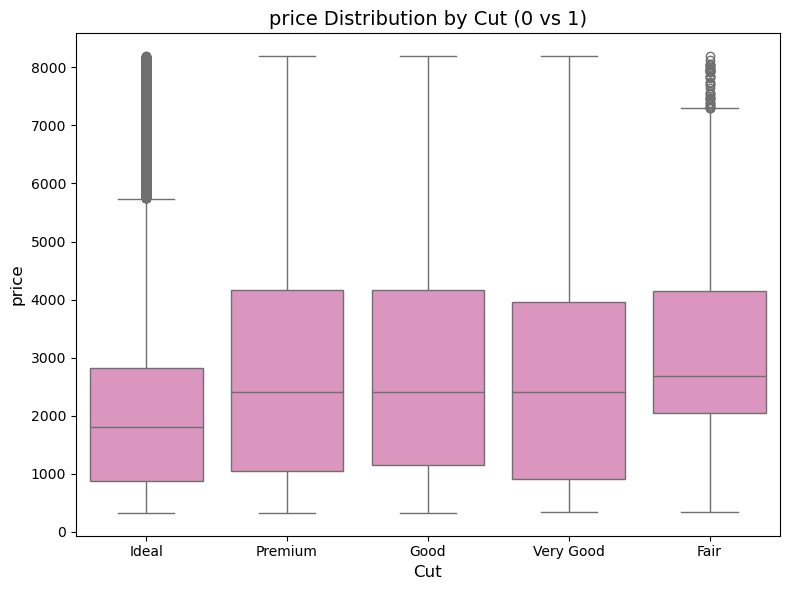

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


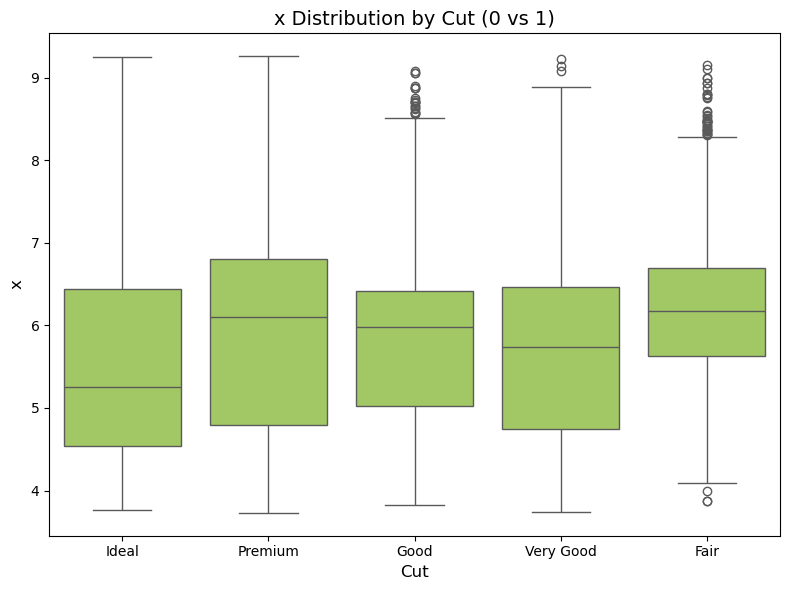

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


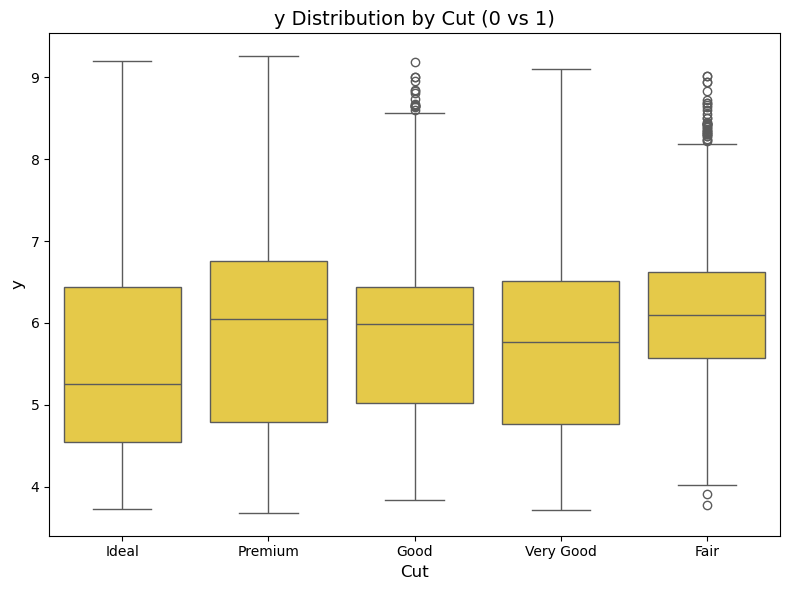

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1728954429.py:6: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])


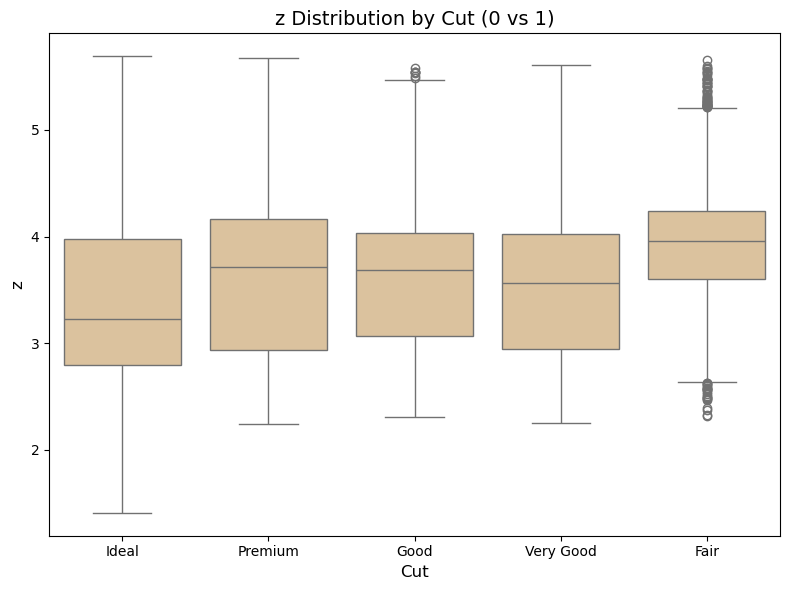

In [21]:
#Bivariate Analysis: Cut vs. Features
numerical_columns= ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
colors = sns.color_palette("Set2", len(numerical_columns))
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cut', y=col, data=df, palette=[colors[i]])  
    plt.title(f"{col} Distribution by Cut (0 vs 1)", fontsize=14)
    plt.xlabel("Cut", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


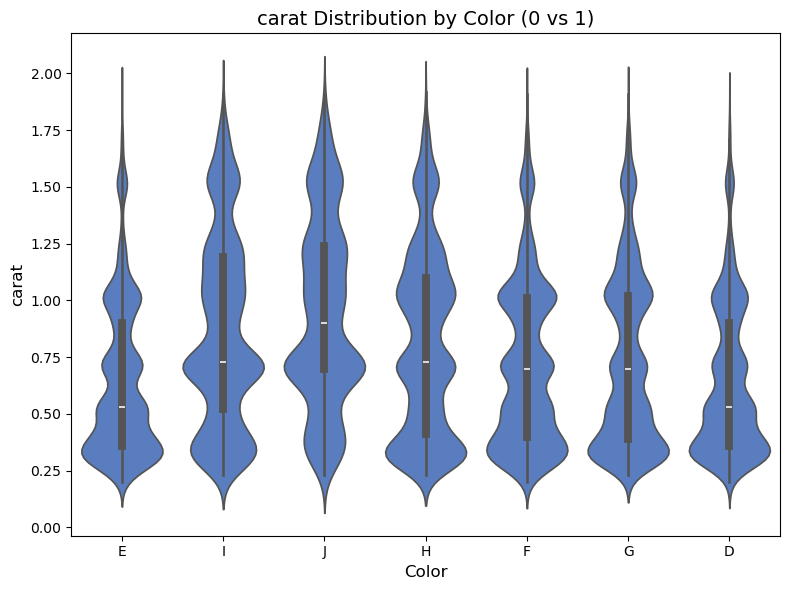

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


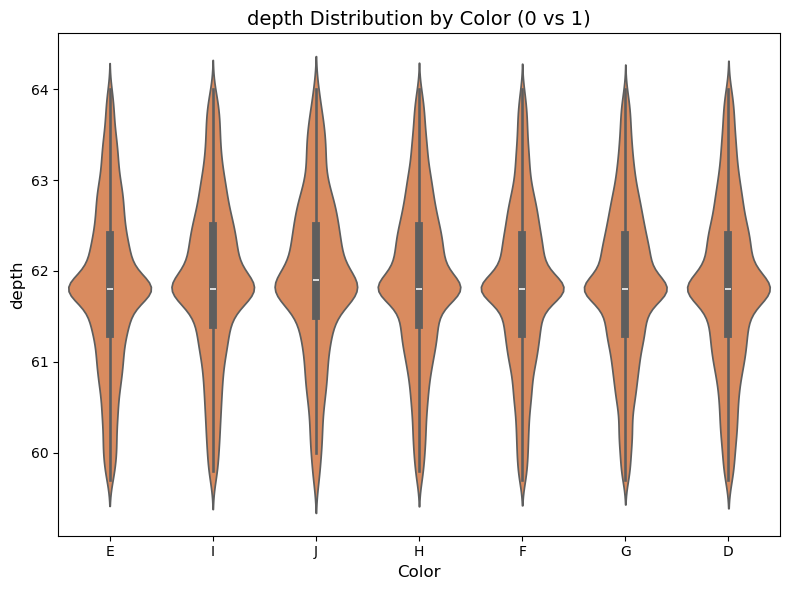

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


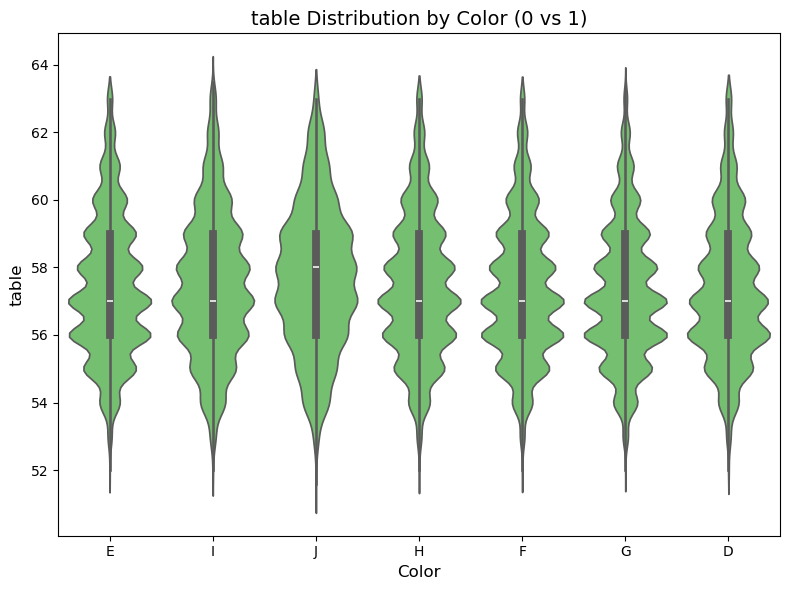

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


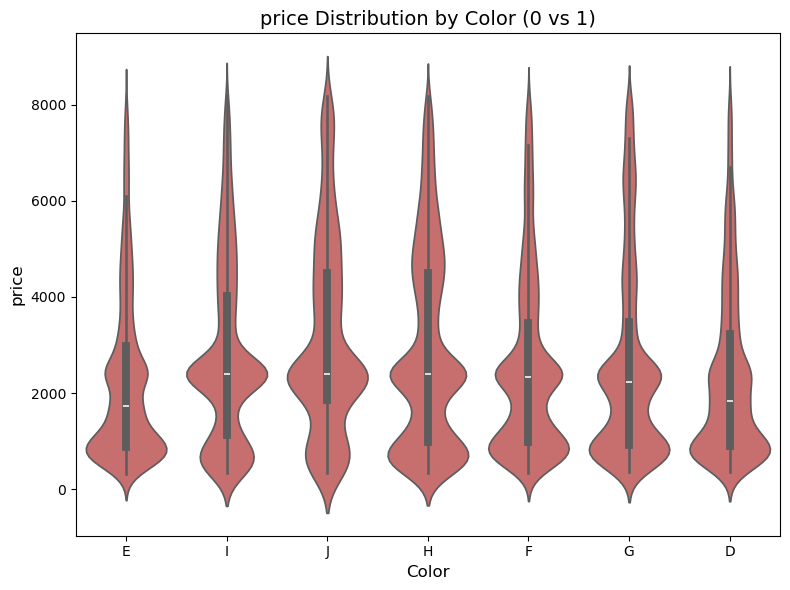

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


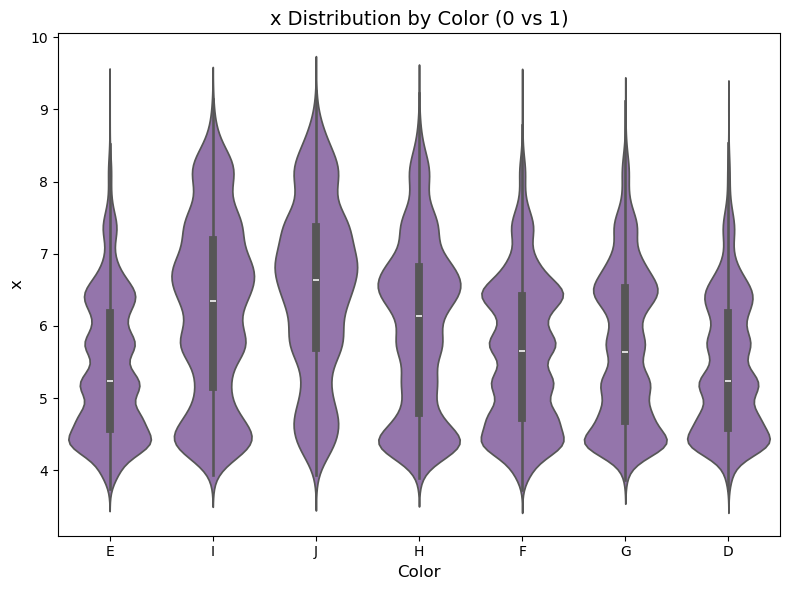

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


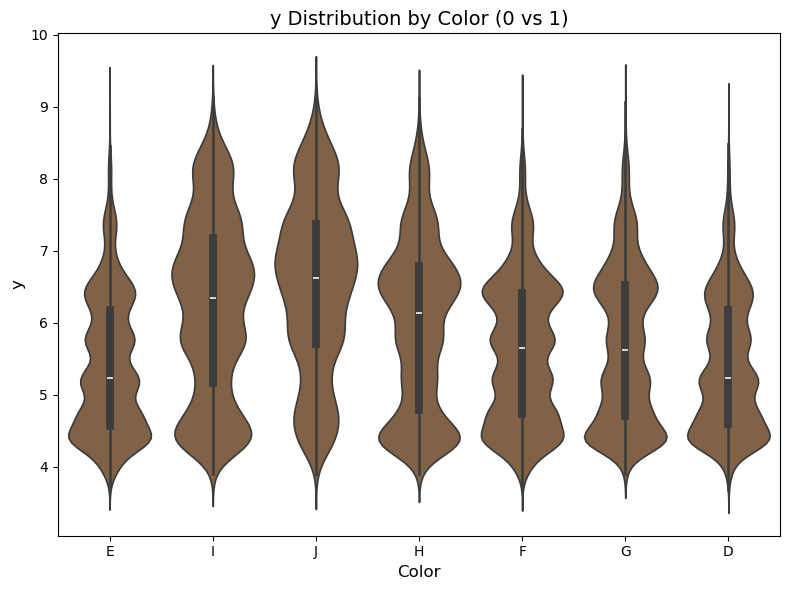

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\1513365730.py:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])


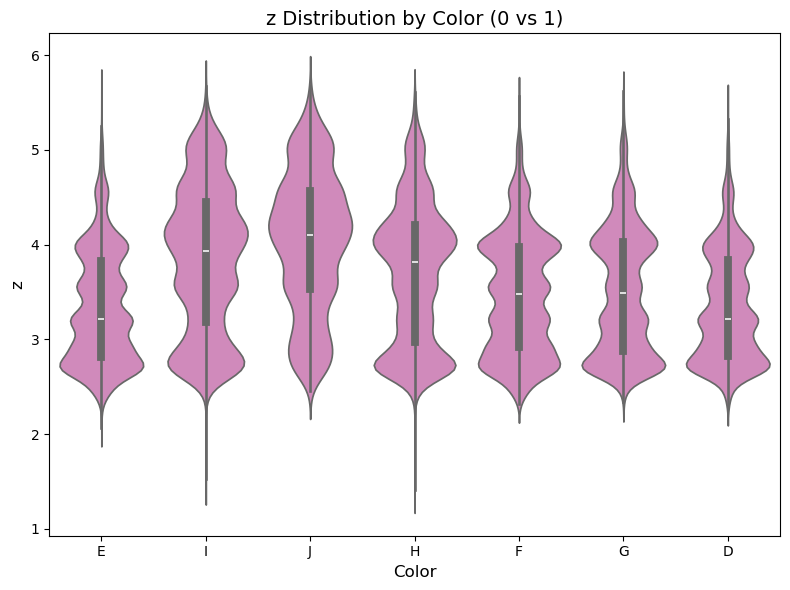

In [22]:
#Bivariate Analysis: Color vs. Features
numerical_columns= ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
colors = sns.color_palette("muted", len(numerical_columns))
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='color', y=col, data=df, palette=[colors[i]])  
    plt.title(f"{col} Distribution by Color (0 vs 1)", fontsize=14)
    plt.xlabel("Color", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


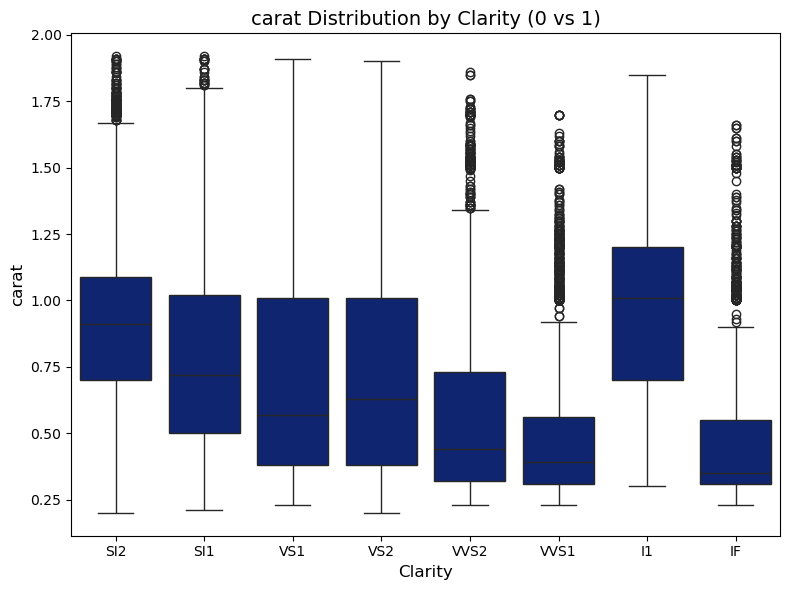

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


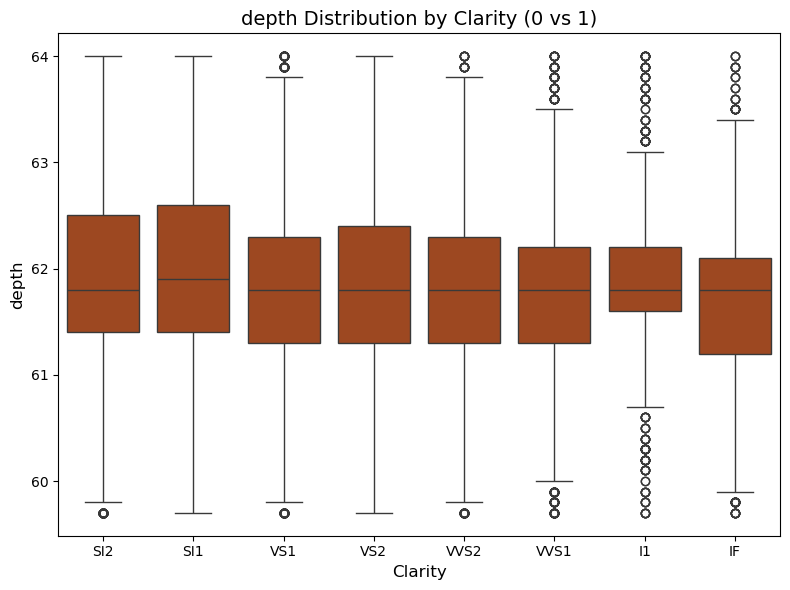

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


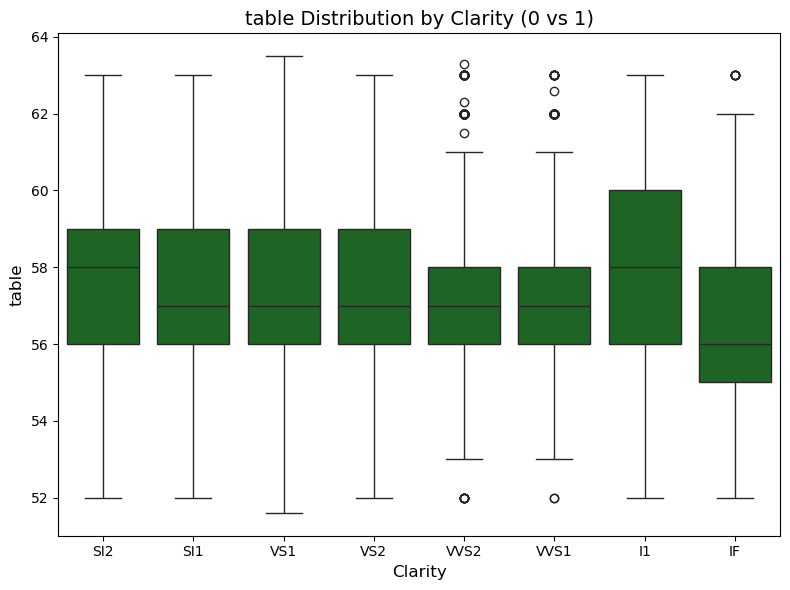

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


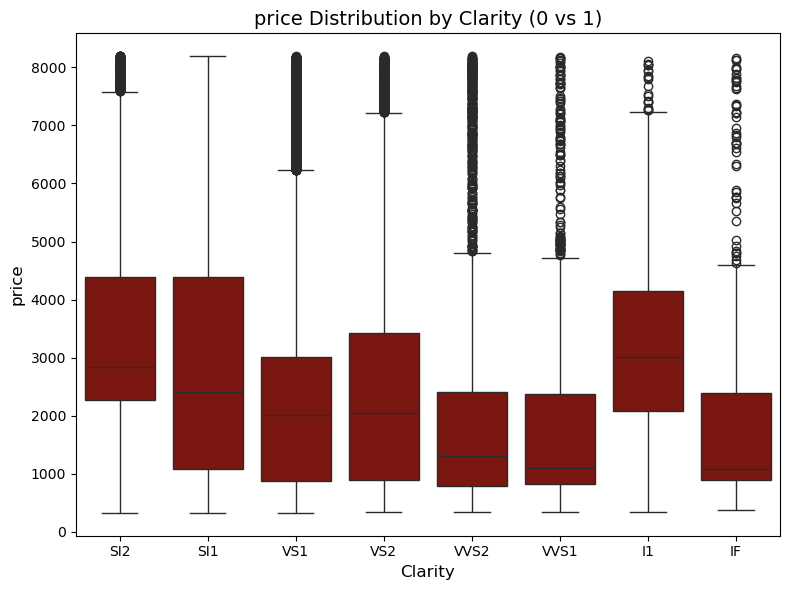

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


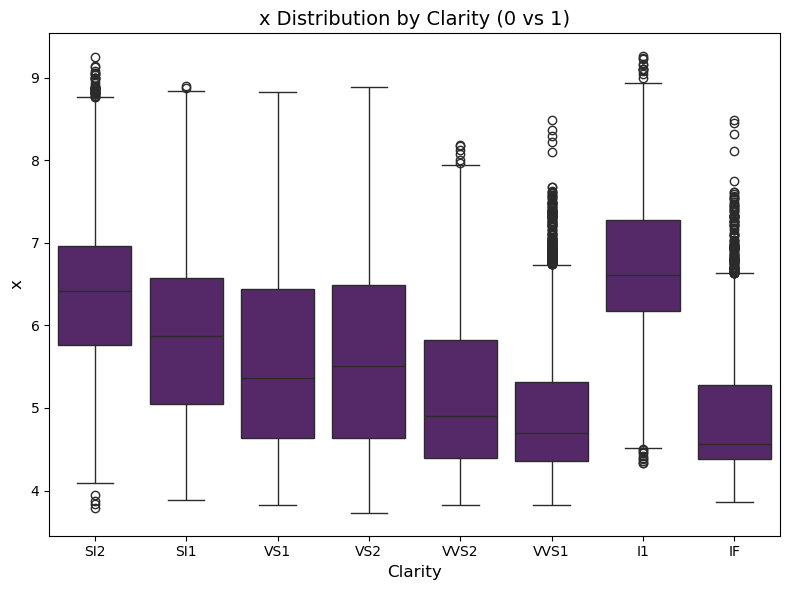

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


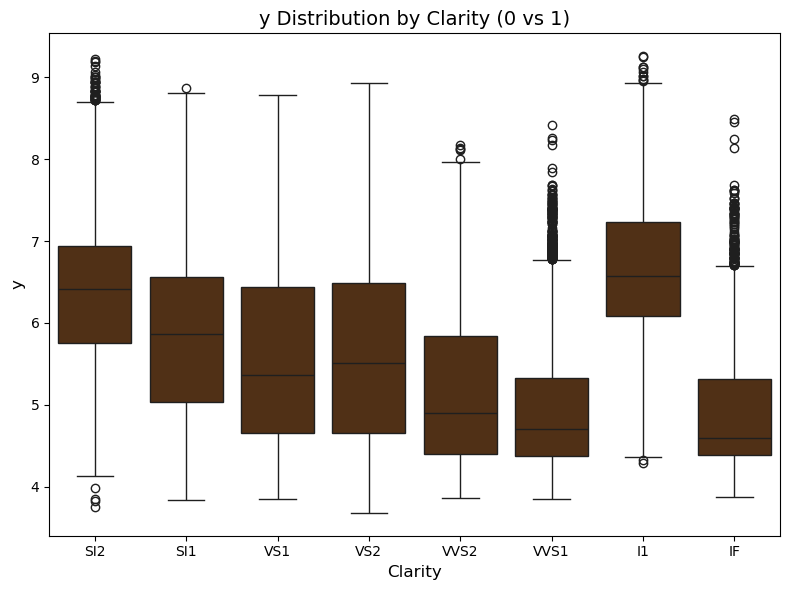

C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])
C:\Users\pc\AppData\Local\Temp\ipykernel_6268\2493378152.py:6: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])


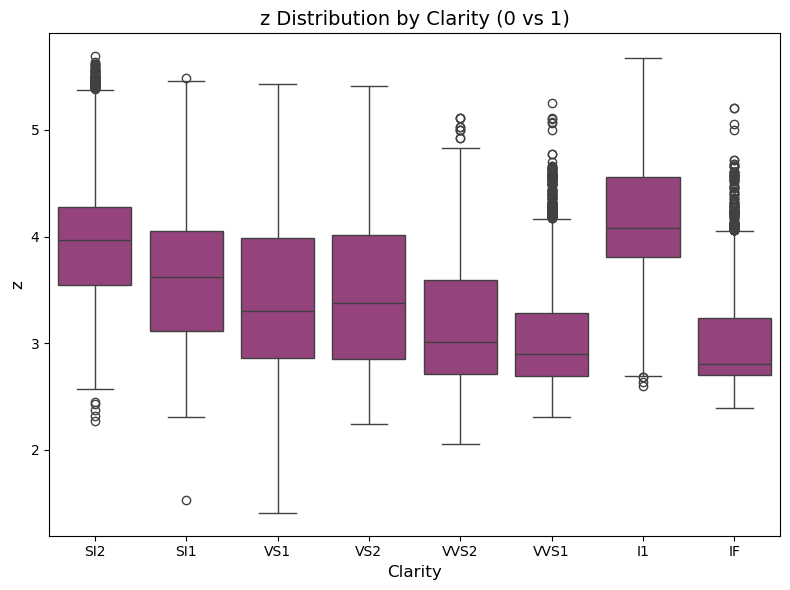

In [23]:
#Bivariate Analysis: Clarity vs. Features
numerical_columns= ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
colors = sns.color_palette("dark", len(numerical_columns))
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='clarity', y=col, data=df, palette=[colors[i]])  
    plt.title(f"{col} Distribution by Clarity (0 vs 1)", fontsize=14)
    plt.xlabel("Clarity", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

### 4.3.3 Correlation Analysis

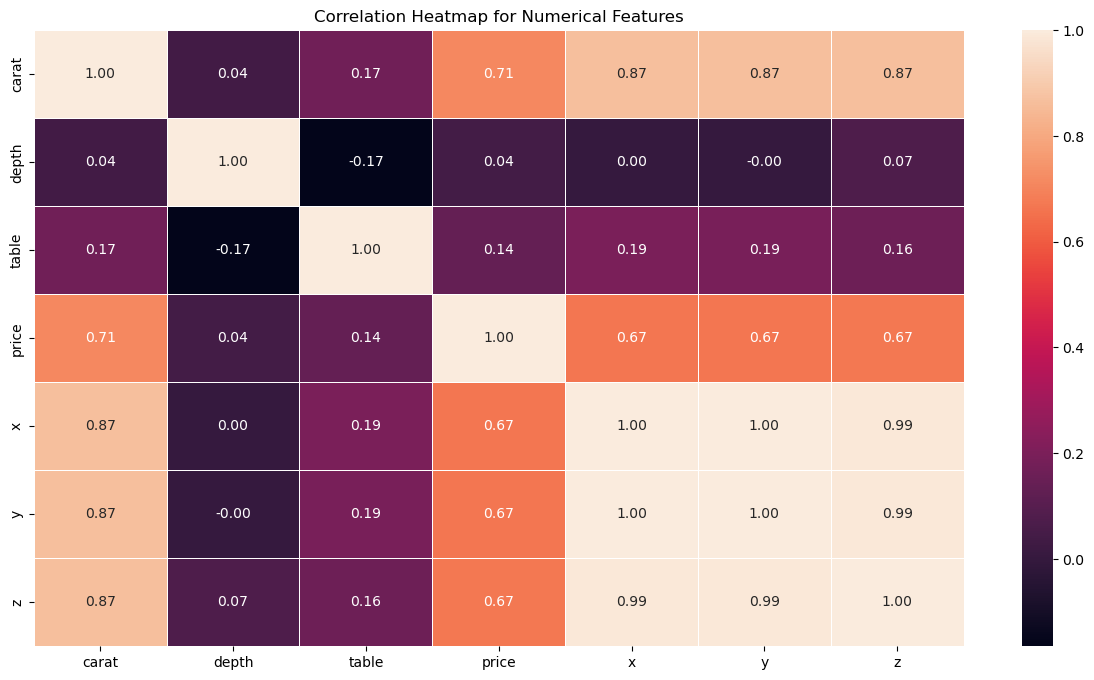

In [24]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# 5. Model Building
## 5.1 Random Forest Regression
### 5.1.1. Encoding Categorical Variables

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_features=cat_cols
for feature in cat_features:
    encoded_features=le.fit_transform(df[feature])
    df[feature]=encoded_features

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1,1,4,61.8,57.0,327.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757.0,6.15,6.12,3.74


### 5.1.2. Data Scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
names=df.columns
indexes=df.index
sc=MinMaxScaler((0,1))
df=sc.fit_transform(df)
data_scaled=pd.DataFrame(df,columns=names,index=indexes)
data_scaled

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.017442,0.50,0.166667,0.428571,0.418605,0.285714,0.000000,0.039783,0.053763,0.238318
1,0.005814,0.75,0.166667,0.285714,0.023256,0.789916,0.000000,0.028933,0.028674,0.210280
2,0.017442,0.25,0.166667,0.571429,0.488372,0.453782,0.000127,0.057866,0.069892,0.210280
3,0.052326,0.75,0.833333,0.714286,0.627907,0.537815,0.001017,0.084991,0.098566,0.285047
4,0.063953,0.25,1.000000,0.428571,0.837209,0.537815,0.001144,0.110307,0.120072,0.313084
...,...,...,...,...,...,...,...,...,...,...
53935,0.302326,0.50,0.000000,0.285714,0.255814,0.453782,0.309052,0.365280,0.372760,0.488318
53936,0.302326,0.25,0.000000,0.285714,0.790698,0.285714,0.309052,0.354430,0.370968,0.514019
53937,0.290698,1.00,0.000000,0.285714,0.720930,0.705882,0.309052,0.349005,0.358423,0.502336
53938,0.383721,0.75,0.666667,0.428571,0.302326,0.537815,0.309052,0.437613,0.437276,0.544393


### 5.1.3. Data Split

In [27]:
#Set target
X=data_scaled.drop(['price'],axis=1)
y=data_scaled['price']
display(X)
y

,carat,cut,color,clarity,depth,table,x,y,z
0,0.017442,0.50,0.166667,0.428571,0.418605,0.285714,0.039783,0.053763,0.238318
1,0.005814,0.75,0.166667,0.285714,0.023256,0.789916,0.028933,0.028674,0.210280
2,0.017442,0.25,0.166667,0.571429,0.488372,0.453782,0.057866,0.069892,0.210280
3,0.052326,0.75,0.833333,0.714286,0.627907,0.537815,0.084991,0.098566,0.285047
4,0.063953,0.25,1.000000,0.428571,0.837209,0.537815,0.110307,0.120072,0.313084
...,...,...,...,...,...,...,...,...,...
53935,0.302326,0.50,0.000000,0.285714,0.255814,0.453782,0.365280,0.372760,0.488318
53936,0.302326,0.25,0.000000,0.285714,0.790698,0.285714,0.354430,0.370968,0.514019
53937,0.290698,1.00,0.000000,0.285714,0.720930,0.705882,0.349005,0.358423,0.502336
53938,0.383721,0.75,0.666667,0.428571,0.302326,0.537815,0.437613,0.437276,0.544393


0        0.000000
1        0.000000
2        0.000127
3        0.001017
4        0.001144
           ...   
53935    0.309052
53936    0.309052
53937    0.309052
53938    0.309052
53939    0.309052
Name: price, Length: 53940, dtype: float64

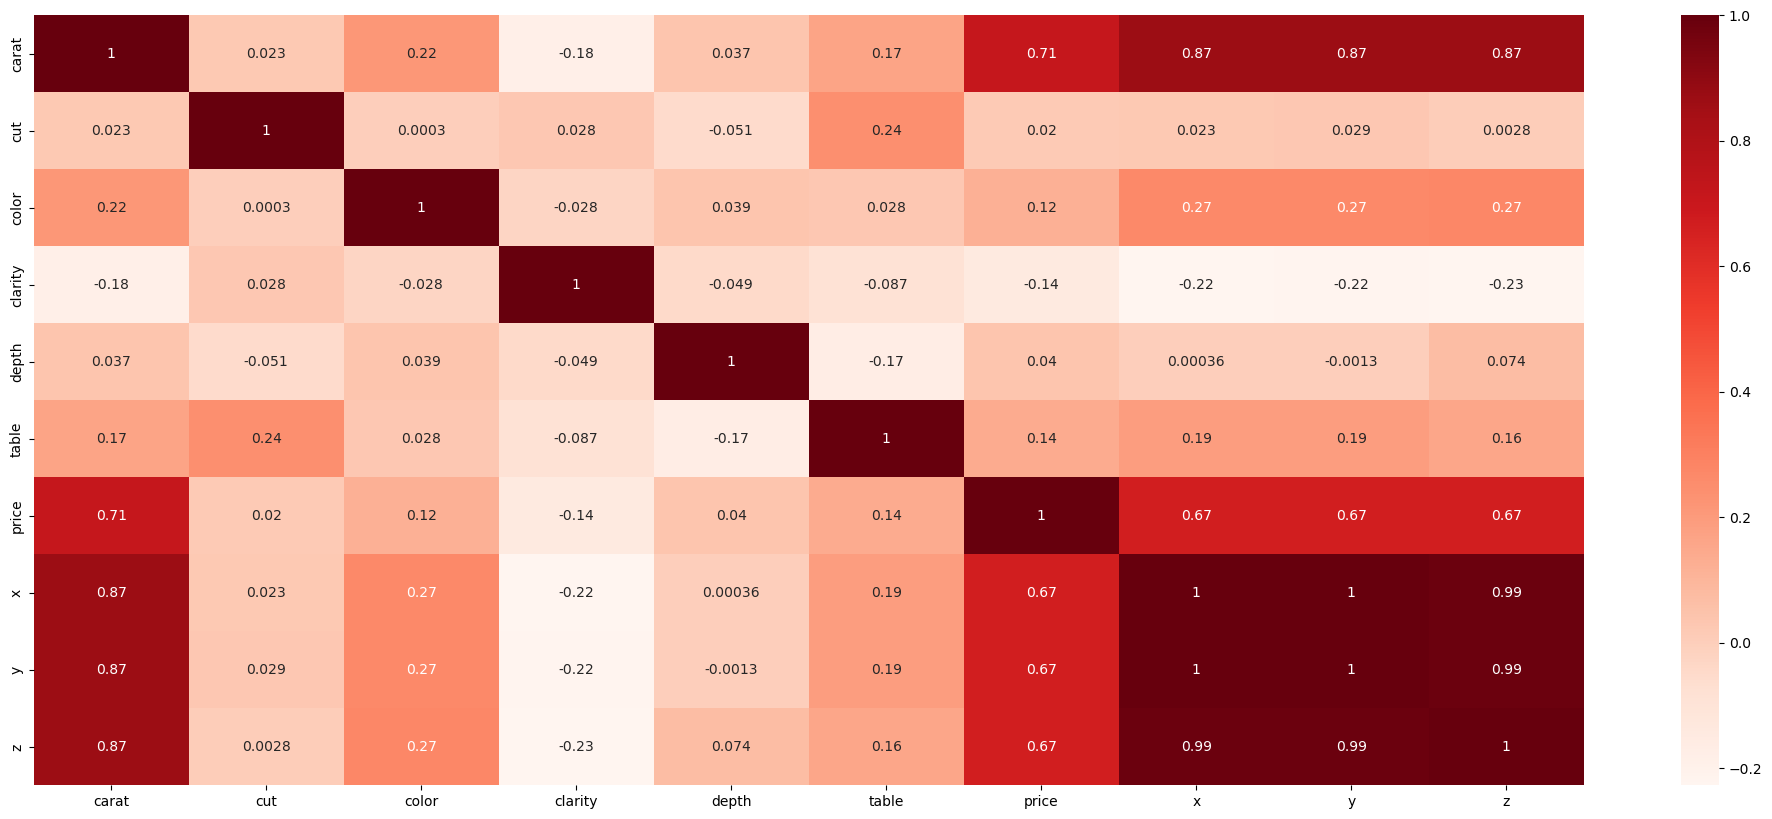

In [28]:
#Pearson's correlation after encoding and scaling 
plt.figure(figsize=(25,10))
cor=data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#Corelation with Traget Variable
cor_target=abs(cor['price'])
rel_f=cor_target
rel_f

carat      0.712449
cut        0.020420
color      0.120406
clarity    0.141187
depth      0.039719
table      0.138533
price      1.000000
x          0.667663
y          0.667607
z          0.668490
Name: price, dtype: float64

In [30]:
#Split dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80, test_size=0.20, random_state=48)
display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))
display(y_test.head(2))

,carat,cut,color,clarity,depth,table,x,y,z
42674,0.191860,0.75,0.500000,0.714286,0.046512,0.705882,0.273056,0.286738,0.406542
3515,0.296512,0.50,0.333333,0.571429,0.418605,0.453782,0.356239,0.369176,0.492991


,carat,cut,color,clarity,depth,table,x,y,z
32735,0.063953,0.75,0.333333,0.714286,0.744186,0.621849,0.106691,0.105735,0.301402
42510,0.209302,0.50,0.500000,0.285714,0.348837,0.621849,0.276673,0.293907,0.427570


42674    0.128274
3515     0.391304
Name: price, dtype: float64

32735    0.060514
42510    0.126621
Name: price, dtype: float64

### 5.1.4. Model Training

In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=48)

#### 5.1.4.1. Model Training with Hyperparameter Tuning using GridSearchCV

In [32]:
params_grid={'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10]
}

In [33]:
grid_search= GridSearchCV(rf_reg, params_grid, n_jobs=-1, cv=5, scoring='r2')

In [34]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=48), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [35]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}

In [36]:
crvf_reg=grid_search.best_estimator_

### 5.1.5. Prediction

In [37]:
#value prediction
y_pred=crvf_reg.predict(X_test)
y_pred

array([0.05852647, 0.15194323, 0.09519449, ..., 0.79059419, 0.592762  ,
       0.06361406])

### 5.1.6. Model Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R squared Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.03
Root Mean Squared Error (RMSE): 0.07
R squared Score: 0.9077
